In [1]:
# Test 4-1 Dataset D
# This test uses a simple CNN to classify between having an Square or a Circle

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.utils import image_dataset_from_directory
tf.config.list_physical_devices('GPU')

2024-04-01 18:51:45.310910: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-01 18:51:45.310966: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-01 18:51:45.345199: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-01 18:51:45.414775: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-01 18:51:46.435236: W tensorflow/compiler/tf2

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
train_dir = '../../Generator/Datasets/Dataset_D/train'
test_dir = '../../Generator/Datasets/Dataset_D/test'

In [3]:
IMG_SIZE = 250
BATCH_SIZE = 32
RANDOM_SEED = random.randint(0, 1000)
print(RANDOM_SEED)

858


In [4]:
train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    seed=RANDOM_SEED,
    shuffle=True,
    )

test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    seed=RANDOM_SEED,
    shuffle=False
    )

Found 3000 files belonging to 2 classes.


2024-04-01 18:51:50.525822: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-01 18:51:50.526039: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-01 18:51:50.526151: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Found 1000 files belonging to 2 classes.


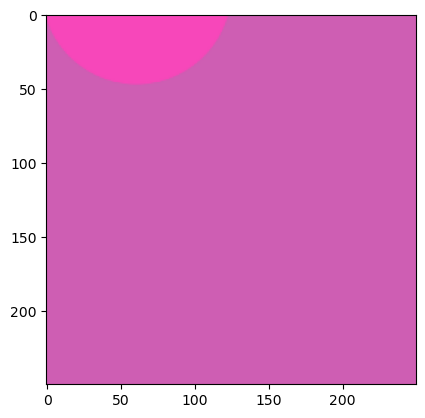

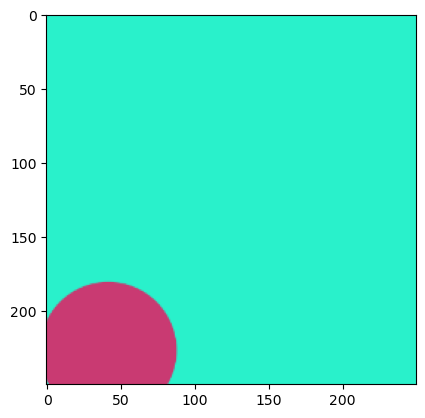

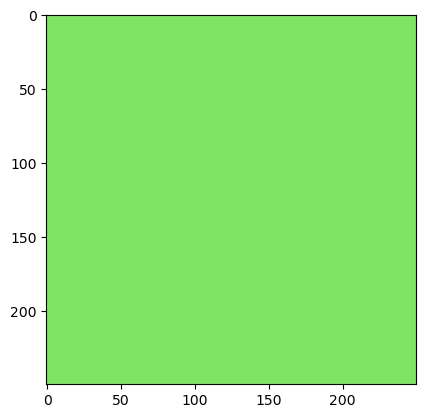

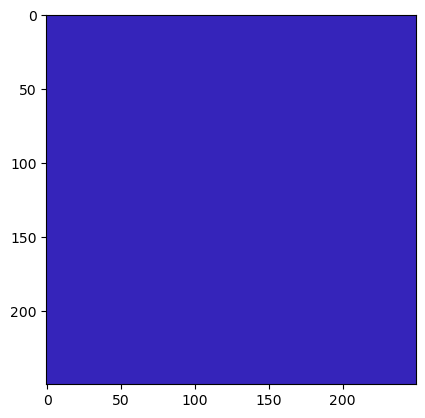

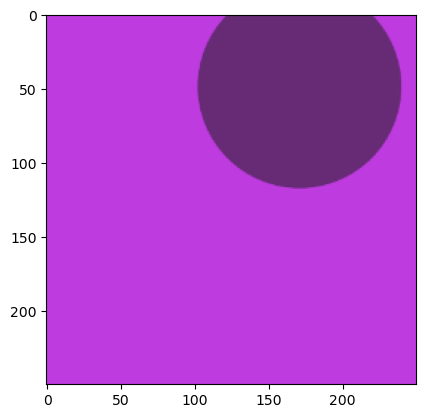

In [5]:
for data_batch, _ in train_dataset.take(1):
    for i in range(5):
        plt.imshow(data_batch[i].numpy().astype("uint8"))
        plt.show()

In [6]:
inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=2, activation="relu",use_bias="true")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=2, activation="relu",use_bias="true")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=2, activation="relu",use_bias="true")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=2, activation="relu",use_bias="true")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [7]:
model.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])

In [9]:
checkpoint_filepath = 'models/4-1/ch-{epoch:03d}.ckpt'
callbacks = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_best_only=True,
    monitor='val_loss',
    verbose=1)


In [10]:
#Best Epoch = ?

history = model.fit(train_dataset, epochs=50, batch_size=32, validation_data=test_dataset, callbacks=[callbacks])

Epoch 1/50


2024-04-01 18:52:09.205160: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2024-04-01 18:52:09.367522: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-04-01 18:52:10.397767: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f15bc8d3cc0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-04-01 18:52:10.397792: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-04-01 18:52:10.407041: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1711993930.455938   21360 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


94/94 [==============================] - ETA: 0s - loss: 0.6930 - acc: 0.5190
Epoch 1: val_loss improved from inf to 0.69397, saving model to models/4-1/ch-001.ckpt
INFO:tensorflow:Assets written to: models/4-1/ch-001.ckpt/assets


INFO:tensorflow:Assets written to: models/4-1/ch-001.ckpt/assets


94/94 [==============================] - 12s 84ms/step - loss: 0.6930 - acc: 0.5190 - val_loss: 0.6940 - val_acc: 0.5040
Epoch 2/50
94/94 [==============================] - ETA: 0s - loss: 0.6858 - acc: 0.5560
Epoch 2: val_loss improved from 0.69397 to 0.68782, saving model to models/4-1/ch-002.ckpt
INFO:tensorflow:Assets written to: models/4-1/ch-002.ckpt/assets


INFO:tensorflow:Assets written to: models/4-1/ch-002.ckpt/assets


94/94 [==============================] - 6s 63ms/step - loss: 0.6858 - acc: 0.5560 - val_loss: 0.6878 - val_acc: 0.5250
Epoch 3/50
93/94 [============================>.] - ETA: 0s - loss: 0.6772 - acc: 0.5823
Epoch 3: val_loss did not improve from 0.68782
94/94 [==============================] - 5s 52ms/step - loss: 0.6769 - acc: 0.5823 - val_loss: 0.6973 - val_acc: 0.5210
Epoch 4/50
94/94 [==============================] - ETA: 0s - loss: 0.6620 - acc: 0.5960
Epoch 4: val_loss improved from 0.68782 to 0.66532, saving model to models/4-1/ch-004.ckpt
INFO:tensorflow:Assets written to: models/4-1/ch-004.ckpt/assets


INFO:tensorflow:Assets written to: models/4-1/ch-004.ckpt/assets


94/94 [==============================] - 6s 60ms/step - loss: 0.6620 - acc: 0.5960 - val_loss: 0.6653 - val_acc: 0.6020
Epoch 5/50
94/94 [==============================] - ETA: 0s - loss: 0.6432 - acc: 0.6180
Epoch 5: val_loss improved from 0.66532 to 0.65097, saving model to models/4-1/ch-005.ckpt
INFO:tensorflow:Assets written to: models/4-1/ch-005.ckpt/assets


INFO:tensorflow:Assets written to: models/4-1/ch-005.ckpt/assets


94/94 [==============================] - 6s 62ms/step - loss: 0.6432 - acc: 0.6180 - val_loss: 0.6510 - val_acc: 0.6140
Epoch 6/50
93/94 [============================>.] - ETA: 0s - loss: 0.6285 - acc: 0.6263
Epoch 6: val_loss did not improve from 0.65097
94/94 [==============================] - 5s 51ms/step - loss: 0.6292 - acc: 0.6243 - val_loss: 0.6635 - val_acc: 0.6250
Epoch 7/50
94/94 [==============================] - ETA: 0s - loss: 0.6042 - acc: 0.6547
Epoch 7: val_loss did not improve from 0.65097
94/94 [==============================] - 5s 51ms/step - loss: 0.6042 - acc: 0.6547 - val_loss: 0.6991 - val_acc: 0.5590
Epoch 8/50
93/94 [============================>.] - ETA: 0s - loss: 0.5909 - acc: 0.6623
Epoch 8: val_loss improved from 0.65097 to 0.63769, saving model to models/4-1/ch-008.ckpt
INFO:tensorflow:Assets written to: models/4-1/ch-008.ckpt/assets


INFO:tensorflow:Assets written to: models/4-1/ch-008.ckpt/assets


94/94 [==============================] - 6s 64ms/step - loss: 0.5914 - acc: 0.6617 - val_loss: 0.6377 - val_acc: 0.5330
Epoch 9/50
94/94 [==============================] - ETA: 0s - loss: 0.5732 - acc: 0.6847
Epoch 9: val_loss improved from 0.63769 to 0.56948, saving model to models/4-1/ch-009.ckpt
INFO:tensorflow:Assets written to: models/4-1/ch-009.ckpt/assets


INFO:tensorflow:Assets written to: models/4-1/ch-009.ckpt/assets


94/94 [==============================] - 6s 60ms/step - loss: 0.5732 - acc: 0.6847 - val_loss: 0.5695 - val_acc: 0.7150
Epoch 10/50
93/94 [============================>.] - ETA: 0s - loss: 0.5526 - acc: 0.7114
Epoch 10: val_loss improved from 0.56948 to 0.55944, saving model to models/4-1/ch-010.ckpt
INFO:tensorflow:Assets written to: models/4-1/ch-010.ckpt/assets


INFO:tensorflow:Assets written to: models/4-1/ch-010.ckpt/assets


94/94 [==============================] - 6s 60ms/step - loss: 0.5516 - acc: 0.7123 - val_loss: 0.5594 - val_acc: 0.7060
Epoch 11/50
93/94 [============================>.] - ETA: 0s - loss: 0.5343 - acc: 0.7386
Epoch 11: val_loss improved from 0.55944 to 0.54484, saving model to models/4-1/ch-011.ckpt
INFO:tensorflow:Assets written to: models/4-1/ch-011.ckpt/assets


INFO:tensorflow:Assets written to: models/4-1/ch-011.ckpt/assets


94/94 [==============================] - 6s 59ms/step - loss: 0.5329 - acc: 0.7397 - val_loss: 0.5448 - val_acc: 0.7330
Epoch 12/50
93/94 [============================>.] - ETA: 0s - loss: 0.5099 - acc: 0.7503
Epoch 12: val_loss improved from 0.54484 to 0.51928, saving model to models/4-1/ch-012.ckpt
INFO:tensorflow:Assets written to: models/4-1/ch-012.ckpt/assets


INFO:tensorflow:Assets written to: models/4-1/ch-012.ckpt/assets


94/94 [==============================] - 6s 59ms/step - loss: 0.5092 - acc: 0.7517 - val_loss: 0.5193 - val_acc: 0.7540
Epoch 13/50
93/94 [============================>.] - ETA: 0s - loss: 0.4824 - acc: 0.7819
Epoch 13: val_loss improved from 0.51928 to 0.50686, saving model to models/4-1/ch-013.ckpt
INFO:tensorflow:Assets written to: models/4-1/ch-013.ckpt/assets


INFO:tensorflow:Assets written to: models/4-1/ch-013.ckpt/assets


94/94 [==============================] - 6s 58ms/step - loss: 0.4825 - acc: 0.7820 - val_loss: 0.5069 - val_acc: 0.7550
Epoch 14/50
93/94 [============================>.] - ETA: 0s - loss: 0.4555 - acc: 0.7960
Epoch 14: val_loss improved from 0.50686 to 0.46099, saving model to models/4-1/ch-014.ckpt
INFO:tensorflow:Assets written to: models/4-1/ch-014.ckpt/assets


INFO:tensorflow:Assets written to: models/4-1/ch-014.ckpt/assets


94/94 [==============================] - 5s 57ms/step - loss: 0.4547 - acc: 0.7967 - val_loss: 0.4610 - val_acc: 0.7850
Epoch 15/50
93/94 [============================>.] - ETA: 0s - loss: 0.4280 - acc: 0.8088
Epoch 15: val_loss did not improve from 0.46099
94/94 [==============================] - 5s 49ms/step - loss: 0.4264 - acc: 0.8103 - val_loss: 0.4781 - val_acc: 0.7750
Epoch 16/50
93/94 [============================>.] - ETA: 0s - loss: 0.3886 - acc: 0.8353
Epoch 16: val_loss improved from 0.46099 to 0.45483, saving model to models/4-1/ch-016.ckpt
INFO:tensorflow:Assets written to: models/4-1/ch-016.ckpt/assets


INFO:tensorflow:Assets written to: models/4-1/ch-016.ckpt/assets


94/94 [==============================] - 6s 59ms/step - loss: 0.3890 - acc: 0.8350 - val_loss: 0.4548 - val_acc: 0.7300
Epoch 17/50
93/94 [============================>.] - ETA: 0s - loss: 0.3605 - acc: 0.8579
Epoch 17: val_loss improved from 0.45483 to 0.36319, saving model to models/4-1/ch-017.ckpt
INFO:tensorflow:Assets written to: models/4-1/ch-017.ckpt/assets


INFO:tensorflow:Assets written to: models/4-1/ch-017.ckpt/assets


94/94 [==============================] - 5s 57ms/step - loss: 0.3601 - acc: 0.8580 - val_loss: 0.3632 - val_acc: 0.8540
Epoch 18/50
93/94 [============================>.] - ETA: 0s - loss: 0.3215 - acc: 0.8784
Epoch 18: val_loss improved from 0.36319 to 0.34973, saving model to models/4-1/ch-018.ckpt
INFO:tensorflow:Assets written to: models/4-1/ch-018.ckpt/assets


INFO:tensorflow:Assets written to: models/4-1/ch-018.ckpt/assets


94/94 [==============================] - 5s 57ms/step - loss: 0.3226 - acc: 0.8770 - val_loss: 0.3497 - val_acc: 0.8540
Epoch 19/50
94/94 [==============================] - ETA: 0s - loss: 0.2939 - acc: 0.8943
Epoch 19: val_loss improved from 0.34973 to 0.29471, saving model to models/4-1/ch-019.ckpt
INFO:tensorflow:Assets written to: models/4-1/ch-019.ckpt/assets


INFO:tensorflow:Assets written to: models/4-1/ch-019.ckpt/assets


94/94 [==============================] - 6s 59ms/step - loss: 0.2939 - acc: 0.8943 - val_loss: 0.2947 - val_acc: 0.9160
Epoch 20/50
93/94 [============================>.] - ETA: 0s - loss: 0.2794 - acc: 0.8985
Epoch 20: val_loss did not improve from 0.29471
94/94 [==============================] - 5s 49ms/step - loss: 0.2798 - acc: 0.8987 - val_loss: 0.3217 - val_acc: 0.8680
Epoch 21/50
94/94 [==============================] - ETA: 0s - loss: 0.2580 - acc: 0.9087
Epoch 21: val_loss improved from 0.29471 to 0.23396, saving model to models/4-1/ch-021.ckpt
INFO:tensorflow:Assets written to: models/4-1/ch-021.ckpt/assets


INFO:tensorflow:Assets written to: models/4-1/ch-021.ckpt/assets


94/94 [==============================] - 6s 60ms/step - loss: 0.2580 - acc: 0.9087 - val_loss: 0.2340 - val_acc: 0.9150
Epoch 22/50
93/94 [============================>.] - ETA: 0s - loss: 0.2418 - acc: 0.9167
Epoch 22: val_loss improved from 0.23396 to 0.21824, saving model to models/4-1/ch-022.ckpt
INFO:tensorflow:Assets written to: models/4-1/ch-022.ckpt/assets


INFO:tensorflow:Assets written to: models/4-1/ch-022.ckpt/assets


94/94 [==============================] - 6s 63ms/step - loss: 0.2416 - acc: 0.9167 - val_loss: 0.2182 - val_acc: 0.9230
Epoch 23/50
94/94 [==============================] - ETA: 0s - loss: 0.2312 - acc: 0.9193
Epoch 23: val_loss improved from 0.21824 to 0.21326, saving model to models/4-1/ch-023.ckpt
INFO:tensorflow:Assets written to: models/4-1/ch-023.ckpt/assets


INFO:tensorflow:Assets written to: models/4-1/ch-023.ckpt/assets


94/94 [==============================] - 6s 60ms/step - loss: 0.2312 - acc: 0.9193 - val_loss: 0.2133 - val_acc: 0.9260
Epoch 24/50
93/94 [============================>.] - ETA: 0s - loss: 0.2156 - acc: 0.9261
Epoch 24: val_loss improved from 0.21326 to 0.19377, saving model to models/4-1/ch-024.ckpt
INFO:tensorflow:Assets written to: models/4-1/ch-024.ckpt/assets


INFO:tensorflow:Assets written to: models/4-1/ch-024.ckpt/assets


94/94 [==============================] - 6s 60ms/step - loss: 0.2154 - acc: 0.9260 - val_loss: 0.1938 - val_acc: 0.9390
Epoch 25/50
94/94 [==============================] - ETA: 0s - loss: 0.2087 - acc: 0.9283
Epoch 25: val_loss improved from 0.19377 to 0.18618, saving model to models/4-1/ch-025.ckpt
INFO:tensorflow:Assets written to: models/4-1/ch-025.ckpt/assets


INFO:tensorflow:Assets written to: models/4-1/ch-025.ckpt/assets


94/94 [==============================] - 6s 60ms/step - loss: 0.2087 - acc: 0.9283 - val_loss: 0.1862 - val_acc: 0.9410
Epoch 26/50
93/94 [============================>.] - ETA: 0s - loss: 0.2085 - acc: 0.9315
Epoch 26: val_loss did not improve from 0.18618
94/94 [==============================] - 5s 52ms/step - loss: 0.2083 - acc: 0.9313 - val_loss: 0.2019 - val_acc: 0.9500
Epoch 27/50
94/94 [==============================] - ETA: 0s - loss: 0.1989 - acc: 0.9317
Epoch 27: val_loss improved from 0.18618 to 0.18226, saving model to models/4-1/ch-027.ckpt
INFO:tensorflow:Assets written to: models/4-1/ch-027.ckpt/assets


INFO:tensorflow:Assets written to: models/4-1/ch-027.ckpt/assets


94/94 [==============================] - 6s 61ms/step - loss: 0.1989 - acc: 0.9317 - val_loss: 0.1823 - val_acc: 0.9410
Epoch 28/50
94/94 [==============================] - ETA: 0s - loss: 0.1934 - acc: 0.9393
Epoch 28: val_loss did not improve from 0.18226
94/94 [==============================] - 5s 51ms/step - loss: 0.1934 - acc: 0.9393 - val_loss: 0.1827 - val_acc: 0.9420
Epoch 29/50
93/94 [============================>.] - ETA: 0s - loss: 0.1911 - acc: 0.9388
Epoch 29: val_loss improved from 0.18226 to 0.17276, saving model to models/4-1/ch-029.ckpt
INFO:tensorflow:Assets written to: models/4-1/ch-029.ckpt/assets


INFO:tensorflow:Assets written to: models/4-1/ch-029.ckpt/assets


94/94 [==============================] - 6s 63ms/step - loss: 0.1917 - acc: 0.9387 - val_loss: 0.1728 - val_acc: 0.9460
Epoch 30/50
94/94 [==============================] - ETA: 0s - loss: 0.1944 - acc: 0.9353
Epoch 30: val_loss did not improve from 0.17276
94/94 [==============================] - 5s 51ms/step - loss: 0.1944 - acc: 0.9353 - val_loss: 0.1750 - val_acc: 0.9460
Epoch 31/50
94/94 [==============================] - ETA: 0s - loss: 0.1844 - acc: 0.9420
Epoch 31: val_loss did not improve from 0.17276
94/94 [==============================] - 5s 51ms/step - loss: 0.1844 - acc: 0.9420 - val_loss: 0.1885 - val_acc: 0.9450
Epoch 32/50
93/94 [============================>.] - ETA: 0s - loss: 0.1929 - acc: 0.9372
Epoch 32: val_loss did not improve from 0.17276
94/94 [==============================] - 5s 52ms/step - loss: 0.1920 - acc: 0.9373 - val_loss: 0.1731 - val_acc: 0.9460
Epoch 33/50
94/94 [==============================] - ETA: 0s - loss: 0.1840 - acc: 0.9410
Epoch 33: val_lo

INFO:tensorflow:Assets written to: models/4-1/ch-033.ckpt/assets


94/94 [==============================] - 6s 61ms/step - loss: 0.1840 - acc: 0.9410 - val_loss: 0.1685 - val_acc: 0.9460
Epoch 34/50
94/94 [==============================] - ETA: 0s - loss: 0.1840 - acc: 0.9433
Epoch 34: val_loss did not improve from 0.16853
94/94 [==============================] - 5s 52ms/step - loss: 0.1840 - acc: 0.9433 - val_loss: 0.1690 - val_acc: 0.9480
Epoch 35/50
93/94 [============================>.] - ETA: 0s - loss: 0.1819 - acc: 0.9425
Epoch 35: val_loss did not improve from 0.16853
94/94 [==============================] - 5s 52ms/step - loss: 0.1810 - acc: 0.9430 - val_loss: 0.1722 - val_acc: 0.9490
Epoch 36/50
93/94 [============================>.] - ETA: 0s - loss: 0.1821 - acc: 0.9399
Epoch 36: val_loss did not improve from 0.16853
94/94 [==============================] - 5s 52ms/step - loss: 0.1823 - acc: 0.9397 - val_loss: 0.1693 - val_acc: 0.9480
Epoch 37/50
93/94 [============================>.] - ETA: 0s - loss: 0.1783 - acc: 0.9442
Epoch 37: val_lo

INFO:tensorflow:Assets written to: models/4-1/ch-037.ckpt/assets


94/94 [==============================] - 6s 62ms/step - loss: 0.1789 - acc: 0.9440 - val_loss: 0.1631 - val_acc: 0.9520
Epoch 38/50
93/94 [============================>.] - ETA: 0s - loss: 0.1784 - acc: 0.9429
Epoch 38: val_loss did not improve from 0.16313
94/94 [==============================] - 5s 52ms/step - loss: 0.1781 - acc: 0.9430 - val_loss: 0.1648 - val_acc: 0.9500
Epoch 39/50
93/94 [============================>.] - ETA: 0s - loss: 0.1840 - acc: 0.9415
Epoch 39: val_loss did not improve from 0.16313
94/94 [==============================] - 5s 52ms/step - loss: 0.1827 - acc: 0.9420 - val_loss: 0.1652 - val_acc: 0.9500
Epoch 40/50
94/94 [==============================] - ETA: 0s - loss: 0.1773 - acc: 0.9437
Epoch 40: val_loss did not improve from 0.16313
94/94 [==============================] - 5s 52ms/step - loss: 0.1773 - acc: 0.9437 - val_loss: 0.1714 - val_acc: 0.9480
Epoch 41/50
93/94 [============================>.] - ETA: 0s - loss: 0.1777 - acc: 0.9476
Epoch 41: val_lo

INFO:tensorflow:Assets written to: models/4-1/ch-041.ckpt/assets


94/94 [==============================] - 6s 63ms/step - loss: 0.1773 - acc: 0.9477 - val_loss: 0.1577 - val_acc: 0.9520
Epoch 42/50
93/94 [============================>.] - ETA: 0s - loss: 0.1706 - acc: 0.9486
Epoch 42: val_loss did not improve from 0.15772
94/94 [==============================] - 5s 51ms/step - loss: 0.1703 - acc: 0.9487 - val_loss: 0.1744 - val_acc: 0.9580
Epoch 43/50
93/94 [============================>.] - ETA: 0s - loss: 0.1725 - acc: 0.9496
Epoch 43: val_loss did not improve from 0.15772
94/94 [==============================] - 5s 52ms/step - loss: 0.1755 - acc: 0.9487 - val_loss: 0.1663 - val_acc: 0.9570
Epoch 44/50
94/94 [==============================] - ETA: 0s - loss: 0.1722 - acc: 0.9453
Epoch 44: val_loss improved from 0.15772 to 0.15486, saving model to models/4-1/ch-044.ckpt
INFO:tensorflow:Assets written to: models/4-1/ch-044.ckpt/assets


INFO:tensorflow:Assets written to: models/4-1/ch-044.ckpt/assets


94/94 [==============================] - 6s 61ms/step - loss: 0.1722 - acc: 0.9453 - val_loss: 0.1549 - val_acc: 0.9550
Epoch 45/50
94/94 [==============================] - ETA: 0s - loss: 0.1719 - acc: 0.9473
Epoch 45: val_loss did not improve from 0.15486
94/94 [==============================] - 5s 52ms/step - loss: 0.1719 - acc: 0.9473 - val_loss: 0.1627 - val_acc: 0.9550
Epoch 46/50
94/94 [==============================] - ETA: 0s - loss: 0.1706 - acc: 0.9483
Epoch 46: val_loss did not improve from 0.15486
94/94 [==============================] - 5s 53ms/step - loss: 0.1706 - acc: 0.9483 - val_loss: 0.1564 - val_acc: 0.9540
Epoch 47/50
93/94 [============================>.] - ETA: 0s - loss: 0.1710 - acc: 0.9486
Epoch 47: val_loss did not improve from 0.15486
94/94 [==============================] - 5s 52ms/step - loss: 0.1708 - acc: 0.9487 - val_loss: 0.1628 - val_acc: 0.9490
Epoch 48/50
93/94 [============================>.] - ETA: 0s - loss: 0.1761 - acc: 0.9459
Epoch 48: val_lo

INFO:tensorflow:Assets written to: models/4-1/ch-049.ckpt/assets


94/94 [==============================] - 6s 63ms/step - loss: 0.1709 - acc: 0.9470 - val_loss: 0.1512 - val_acc: 0.9550
Epoch 50/50
94/94 [==============================] - ETA: 0s - loss: 0.1652 - acc: 0.9497
Epoch 50: val_loss did not improve from 0.15115
94/94 [==============================] - 5s 52ms/step - loss: 0.1652 - acc: 0.9497 - val_loss: 0.1512 - val_acc: 0.9560


In [11]:
val_loss, val_acc = model.evaluate(test_dataset, batch_size=64)
print(val_loss, val_acc)

32/32 [==============================] - 1s 21ms/step - loss: 0.1512 - acc: 0.9560
0.1511891782283783 0.9559999704360962


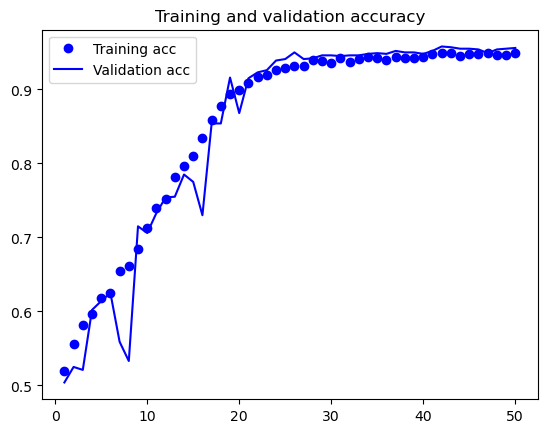

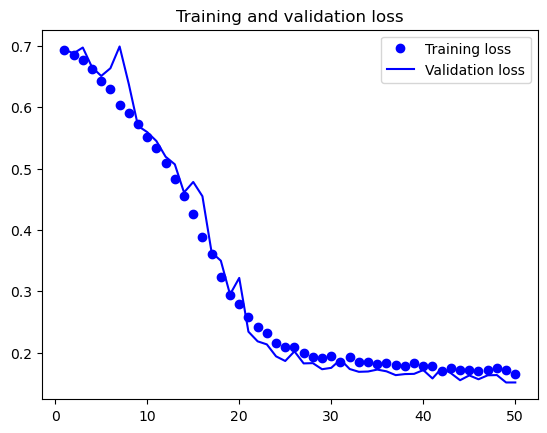

In [14]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig("graphs/4-1/train_test_loss",dpi=100)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig("graphs/4-1/train_test_acc",dpi=100)
plt.show()


In [16]:
img = tf.keras.preprocessing.image.load_img('../../Generator/Datasets/Dataset_D/test/circle/circle_309.png', target_size=(IMG_SIZE, IMG_SIZE))

In [19]:
img = tf.keras.preprocessing.image.load_img('../../Generator/Datasets/Dataset_D/test/none/none_1.png', target_size=(IMG_SIZE, IMG_SIZE))

In [20]:
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
print(img_array.shape)
result = model.predict(img_array)
print("Result: ", result.round())

(1, 250, 250, 3)
1/1 [==============================] - 0s 15ms/step
Result:  [[1.]]


In [22]:
import csv
with open('results/4-1/results.csv', mode='w') as file:
    writer = csv.writer(file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    writer.writerow(['Index', 'Label', 'Prediction'])
    for i, (data_batch, labels_batch) in enumerate(test_dataset):
        predictions = model.predict(data_batch)
        for j in range(len(predictions)):
            writer.writerow([i * BATCH_SIZE + j, labels_batch[j].numpy(), int(predictions[j][0].round())])

1/1 [==============================] - 0s 17ms/step


In [ ]:
with open('results/4-1/results.csv', mode='r') as file:
    csvFile = csv.reader(file)
    for lines in csvFile:
        if lines[1] != lines[2]:
            print(lines)

In [ ]:
output_folder = 'results/4-1/failed_images'
file_name = 'results/4-1/failed_filenames.txt'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

    # Read the lines from the input text file
    with open(file_name, 'r') as file:
        lines = file.readlines()

    # Copy images to the output folder
    for line in lines:
        # Remove trailing newline characters
        line = line.strip()
        # Check if the line is a valid image path
        if os.path.exists(line):
            # Extract the filename from the path
            filename = os.path.basename(line)
            # Copy the image to the output folder
            shutil.copy(line, os.path.join(output_folder, filename))
        else:
            print(f"Image path '{line}' does not exist.")